# Espectroscipia Óptica do Hidrogênio e Sódio

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

sns.set_theme()

In [47]:
def linear(x, a, b): return a * x + b
def gaussian(x, A, m, s): return A * np.exp( - (x - m)**2 / (2 * s**2) )

## Calibração com Mercúrio

In [48]:
hg_data		= [ [], [] ]
hg_peaks	= [ {}, {} ]
hg_fits		= [ [], [] ]

### Dia 1

In [49]:
hg_data[0] = np.loadtxt('data/mercurio_1.txt').transpose()

In [50]:
peaks = find_peaks(hg_data[0][1], prominence=8000, distance=20)[0]
len(peaks)

14

In [51]:
peaks_guess = pd.read_csv('data/mercurio_picos.txt', sep='\t')

In [52]:
tmp_peaks = []

for guess in np.array(peaks_guess):
	popt, pcov = curve_fit(
		gaussian,
		xdata=hg_data[0][0],
		ydata=hg_data[0][1],
		p0=[ hg_data[0][1][guess[0]], guess[0], 10 ]
	)
	tmp_peaks.append(popt)

In [53]:
hg_peaks[0] = { 'Pixel': [], 'Lambda (A)': [], 'Sigma Pixel': [] }

for i,peak in enumerate(tmp_peaks):
	hg_peaks[0]['Pixel'].append(peak[1])
	hg_peaks[0]['Lambda (A)'].append(peaks_guess['Lambda (A)'][i])
	hg_peaks[0]['Sigma Pixel'].append(peak[2])

hg_peaks[0] = pd.DataFrame(hg_peaks[0])

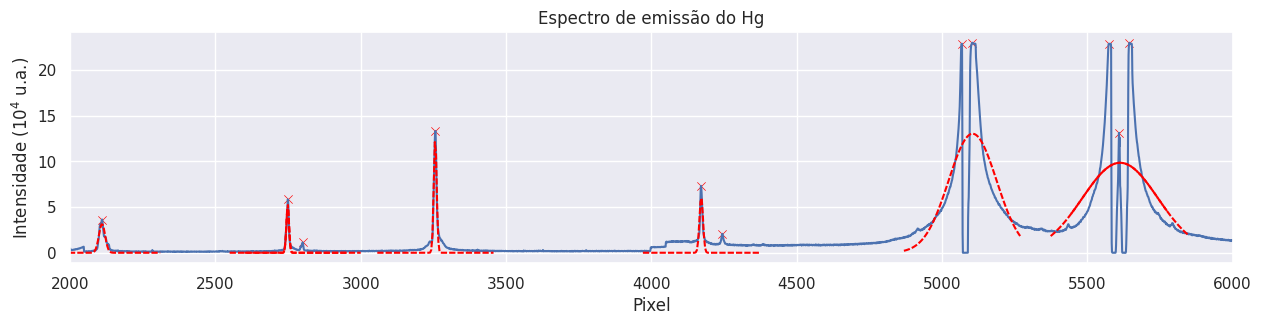

In [54]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do Hg')

sns.lineplot(x=hg_data[0][0], y=hg_data[0][1]/1E4)
sns.scatterplot(x=peaks, y=hg_data[0][1][peaks]/1E4, color='red', marker='x')

for i,peak in enumerate(tmp_peaks):
	x = np.linspace(peaks_guess['Pixel'][i]-200, peaks_guess['Pixel'][i]+200, 100)
	sns.lineplot(x=x, y=gaussian(x, peak[0], peak[1], peak[2])/1E4, dashes=(3,1), color='red')

plt.xlim(2000, 6000)
plt.xlabel('Pixel')
plt.ylabel('Intensidade ($10^4$ u.a.)')

plt.savefig('plots/hg_calibration_spec_1.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
hg_peaks[0]

,Pixel,Lambda (A),Sigma Pixel
0,2109.786434,3650,10.641160
1,2748.786076,4047,4.428910
2,2748.786001,4078,4.429124
3,3256.346974,4344,4.995016
4,4171.617240,4916,6.040746
5,5105.428234,5461,82.573808
6,5612.951899,5770,130.198013
7,5612.952938,5790,130.193169


In [56]:
popt, pcov = curve_fit(
	linear,
	xdata=hg_peaks[0]['Pixel'],
	ydata=hg_peaks[0]['Lambda (A)'],
)

In [57]:
hg_fits[0] = np.array(popt)
hg_fits[0], np.sqrt(pcov)

/tmp/ipykernel_3406/2622312633.py:2: RuntimeWarning: invalid value encountered in sqrt
  hg_fits[0], np.sqrt(pcov)


(array([6.03384103e-01, 2.39123232e+03]),
 array([[4.32603008e-03,            nan],
        [           nan, 1.78789188e+01]]))

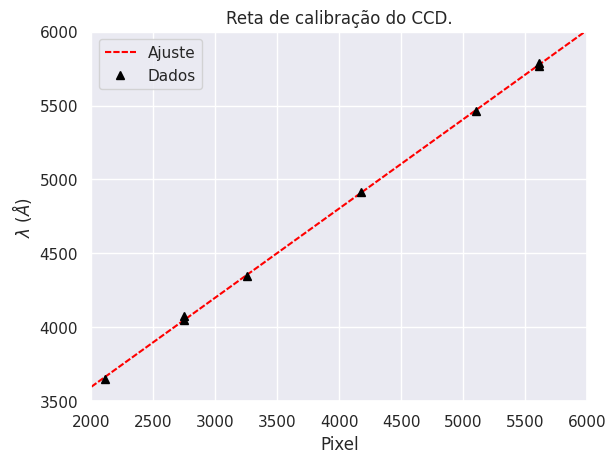

In [58]:
plt.title('Reta de calibração do CCD.')

x = np.linspace(2000, 6000, 10)

sns.lineplot(x=x, y=popt[0]*x+popt[1], color='red', dashes=(3,1), label='Ajuste')
plt.errorbar(
	x=hg_peaks[0]['Pixel'],
	y=hg_peaks[0]['Lambda (A)'],
	marker='^', fmt=' ', color='black', capsize=2, label='Dados'
)

plt.xlim(2000, 6000)
plt.ylim(3500, 6000)
plt.xlabel('Pixel')
plt.ylabel('$\\lambda$ ($\\AA$)')
plt.legend()

plt.show()

### Dia 2

In [59]:
hg_data[1] = np.loadtxt('data/mercurio_2.txt').transpose()

In [60]:
tmp_peaks = []

for guess in np.array(peaks_guess):
	popt, pcov = curve_fit(
		gaussian,
		xdata=hg_data[1][0][guess[0]-200:guess[0]+200],
		ydata=hg_data[1][1][guess[0]-200:guess[0]+200],
		p0=[ hg_data[1][1][guess[0]], guess[0], 1 ]
	)
	tmp_peaks.append(popt)

In [61]:
hg_peaks[1] = { 'Pixel': [], 'Lambda (A)': [], 'Sigma Pixel': [] }

for i,peak in enumerate(tmp_peaks):
	hg_peaks[1]['Pixel'].append(peak[1])
	hg_peaks[1]['Lambda (A)'].append(peaks_guess['Lambda (A)'][i])
	hg_peaks[1]['Sigma Pixel'].append(peak[2])

hg_peaks[1] = pd.DataFrame(hg_peaks[1])

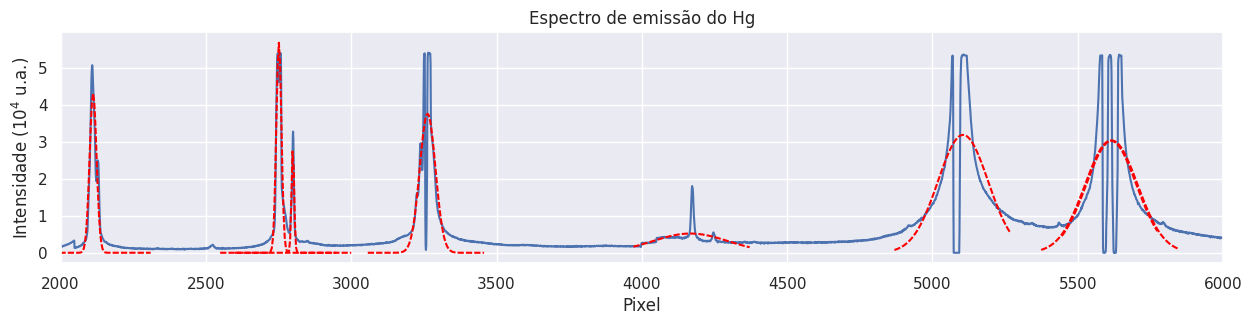

In [62]:
plt.figure(figsize=(15, 3))
plt.title('Espectro de emissão do Hg')

sns.lineplot(x=hg_data[1][0], y=hg_data[1][1]/1E4)

for i,peak in enumerate(tmp_peaks):
	x = np.linspace(peaks_guess['Pixel'][i]-200, peaks_guess['Pixel'][i]+200, 100)
	sns.lineplot(x=x, y=gaussian(x, peak[0], peak[1], peak[2])/1E4, dashes=(3,1), color='red')

plt.xlim(2000, 6000)
plt.xlabel('Pixel')
plt.ylabel('Intensidade ($10^4$ u.a.)')

plt.savefig('plots/hg_calibration_spec_2.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
hg_peaks[1]

,Pixel,Lambda (A),Sigma Pixel
0,2111.831382,3650,11.908197
1,2751.056055,4047,8.821521
2,2799.100604,4078,4.544041
3,3262.798470,4344,27.135671
4,4167.170550,4916,129.269969
5,5105.211874,5461,86.320524
6,5613.309991,5770,88.445098
7,5617.484246,5790,88.446075


In [64]:
popt, pcov = curve_fit(
	linear,
	xdata=hg_peaks[1]['Pixel'],
	ydata=hg_peaks[1]['Lambda (A)'],
)

In [65]:
hg_fits[1] = np.array(popt)
hg_fits[1], np.sqrt(pcov)

/tmp/ipykernel_3406/3390843478.py:2: RuntimeWarning: invalid value encountered in sqrt
  hg_fits[1], np.sqrt(pcov)


(array([6.06181367e-01, 2.37561929e+03]),
 array([[2.74726957e-03,            nan],
        [           nan, 1.13689685e+01]]))

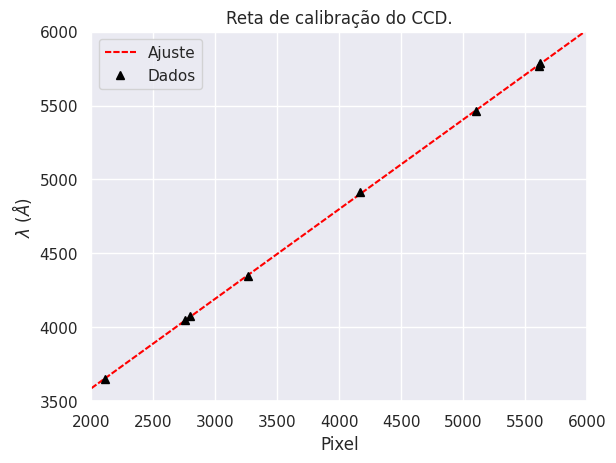

In [66]:
plt.title('Reta de calibração do CCD.')

x = np.linspace(2000, 6000, 10)

sns.lineplot(x=x, y=popt[0]*x+popt[1], color='red', dashes=(3,1), label='Ajuste')
plt.errorbar(
	x=hg_peaks[1]['Pixel'],
	y=hg_peaks[1]['Lambda (A)'],
	marker='^', fmt=' ', color='black', capsize=2, label='Dados'
)

plt.xlim(2000, 6000)
plt.ylim(3500, 6000)
plt.xlabel('Pixel')
plt.ylabel('$\\lambda$ ($\\AA$)')
plt.legend()

plt.show()

### Dias 1 e 2

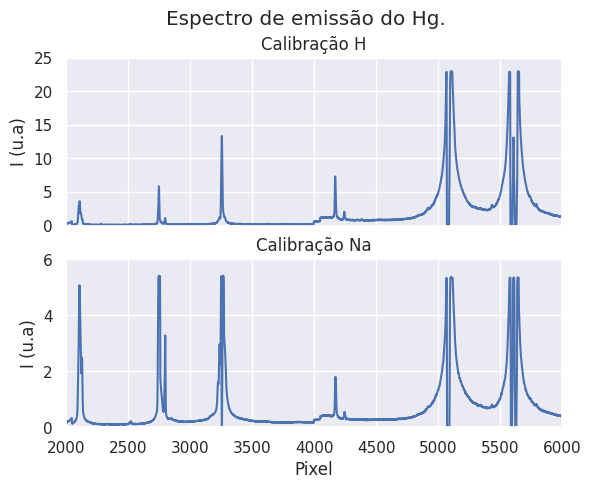

In [67]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={  })
plt.suptitle('Espectro de emissão do Hg.')

sns.lineplot(x=hg_data[0][0], y=hg_data[0][1]/1E4, ax=axs[0])
sns.lineplot(x=hg_data[1][0], y=hg_data[1][1]/1E4, ax=axs[1])

axs[0].set(ylabel='I (u.a)', title='Calibração H', ylim=(0, 25))
axs[1].set(ylabel='I (u.a)', xlabel='Pixel', xlim=(2000, 6000), ylim=(0, 6), title='Calibração Na')

plt.savefig('plots/hg_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
hg_fits

[array([6.03384103e-01, 2.39123232e+03]),
 array([6.06181367e-01, 2.37561929e+03])]

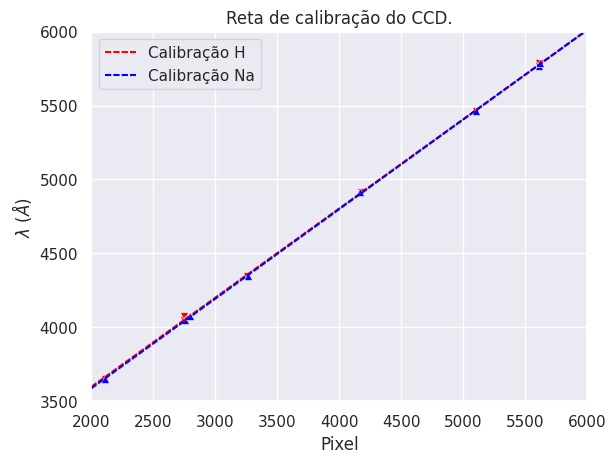

In [69]:
plt.title('Reta de calibração do CCD.')

x = np.linspace(2000, 6000, 10)

sns.scatterplot(x=hg_peaks[0]['Pixel'], y=hg_peaks[0]['Lambda (A)'], color='red', marker='v')
sns.scatterplot(x=hg_peaks[1]['Pixel'], y=hg_peaks[1]['Lambda (A)'], color='blue', marker='^')

sns.lineplot(x=x, y=linear(x, hg_fits[0][0], hg_fits[0][1]), color='red', label='Calibração H', dashes=(3,1))
sns.lineplot(x=x, y=linear(x, hg_fits[1][0], hg_fits[1][1]), color='blue', label='Calibração Na', dashes=(3,1))



plt.xlim(2000, 6000)
plt.ylim(3500, 6000)
plt.xlabel('Pixel')
plt.ylabel('$\\lambda$ ($\\AA$)')
plt.legend()

plt.savefig('plots/hg_calibration.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise do Hidrogênio

In [70]:
h_data = np.loadtxt('data/hidrogenio.txt').transpose()
x = linear(h_data[0], hg_fits[0][0], hg_fits[0][1])

In [71]:
peaks = find_peaks(h_data[1], prominence=1000)[0]

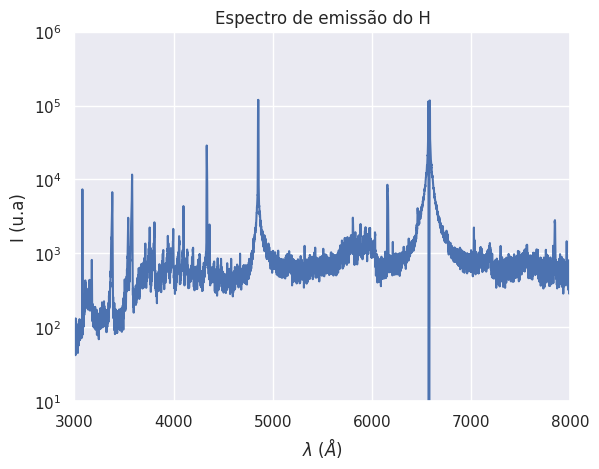

In [72]:
plt.title('Espectro de emissão do H')

sns.lineplot(x=x, y=h_data[1])

#sns.scatterplot(x=x[peaks], y=h_data[1][peaks], color='red', marker='x')
#plt.vlines(x=[ 3835, 3889, 3970, 4100, 4340, 4860, 6560], ymin=0, ymax=1E6, color='gray', linestyles='dashed', alpha=0.7)

plt.xlabel('$\\lambda$ ($\\AA$)')
plt.ylabel('I (u.a)')
plt.xlim(3000, 8000)
plt.ylim(1E1, 1E6)
plt.yscale('log')

plt.savefig('plots/h_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [73]:
h_peaks = x[peaks[[ 8, 10, 11, 13, 23 ]]]

In [74]:
for i in np.arange(8, 3, -1):
	print(f'{i}\t{h_peaks[8-i]}')

8	3996.234030143901
7	4098.809327645504
6	4333.525743693292
5	4853.039456333767
4	6459.24793838829


In [75]:
xdata = 1 / np.power([ 7, 6, 5, 4, 3 ], 2)
ydata = 1 / h_peaks

In [76]:
popt, pcov = curve_fit(
	linear,
	xdata=xdata,
	ydata=ydata
)

$$ \frac{1}{\lambda} = R_H \left( \frac{1}{2^2} - \frac{1}{n^2} \right) $$

$$ y(x) = - xR_H + 0.25 R_H $$

In [77]:
Rh, sRh= -popt[0] * 1E10, np.sqrt(pcov[0,0]) * 1E10
Rh, sRh

(10612988.269952366, 99062.53811453414)

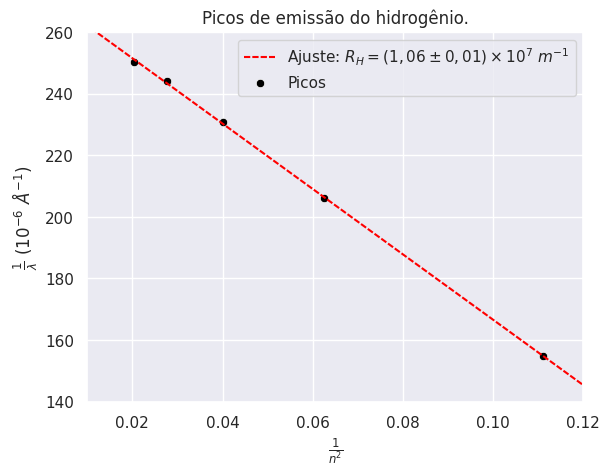

In [78]:
plt.title('Picos de emissão do hidrogênio.')

x = np.linspace(0, 0.12, 10)

sns.lineplot(x=x, y=linear(x, popt[0], popt[1])*1E6, color='red', dashes=(3,1), label='Ajuste: $R_H=(1,06\\pm0,01)\\times 10^7$ $m^{-1}$')
sns.scatterplot(x=xdata, y=ydata*1E6, color='black', label='Picos', marker='o')

plt.xlim(0.01, 0.12)
plt.ylim(140, 260)
plt.xlabel('$\\frac{1}{n^2}$')
plt.ylabel('$\\frac{1}{\\lambda}$ ($10^{-6}$ $\\AA^{-1}$)')

plt.savefig('plots/h_rydberg.png', dpi=300, bbox_inches='tight')
plt.show()

## Análise do Sódio

In [84]:
na_data = np.loadtxt('data/sodio.txt').transpose()
x = linear(na_data[0], hg_fits[1][0], hg_fits[1][1])

In [85]:
na_lines_nist = np.loadtxt('data/na_lines_nist.txt').transpose()

In [86]:
na_series_nist = {
	's': [ [5, 6, 7], [6161, 5122.7, 4725.2] ],
	'p': [ [3, 3, 4], [5880.7, 5901.6, 3316] ],
	'd': [ [4, 5, 6], [5679, 4951.7, 4639.2] ]
}

In [87]:
peaks = find_peaks(na_data[1], distance=20, prominence=2000)[0]
len(peaks)

19

In [88]:
na_series = {
	's': [ [5, 6, 7], [6167, 5138, 4735] ],
	'p': [ [3, 3, 4], [5923, 5871, 3301] ],
	'd': [ [4, 5, 6], [5675, 4965, 4652] ]
}

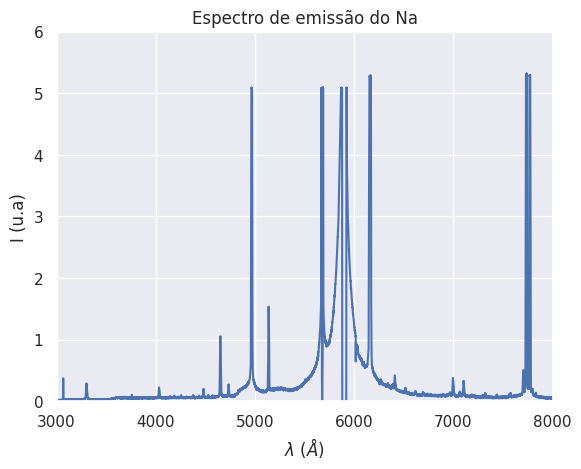

In [92]:
plt.title('Espectro de emissão do Na')

sns.lineplot(x=x, y=na_data[1]/1E4)

'''
sns.scatterplot(x=x[peaks], y=na_data[1][peaks]/1E4, marker='x', color='red')
for i,peak in enumerate(peaks): plt.annotate(f'{x[peak]:.0f}', ( x[peak], na_data[1][peak]/1E4))
'''

plt.xlabel('$\\lambda$ ($\\AA$)')
plt.ylabel('I (u.a)')
plt.xlim(3000, 8000)
plt.ylim(0, 6)

plt.savefig('plots/na_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

### Correções quânticas

In [153]:
fits = { 'd': [], 'p': [] }

Fazemos o ajuste para os picos das séries difusa para obter os valores da constante de Rydberg $R_H$ e da correção quântica $p$.

In [154]:
xdata = 1 / np.power(na_series['d'][0], 2)
ydata = 1 / np.array(na_series['d'][1])

In [155]:
popt, pcov = curve_fit(linear, xdata=xdata, ydata=ydata)
fits['d'] = list(popt)

In [156]:
R = -popt[0] * 1E10
p = 3 - np.sqrt(R / (popt[1]*1E10))
R, p

(11164845.213833595, 0.8696631470928753)

Fazermos o ajuste da série principal, a parir dos valores de $R_H$ e $p$ obtidos anteriormente, para determinar o valor da correção quântica $s$.

In [162]:
xdata = 1 / np.power(na_series['p'][0] - p, 2)
ydata = 1 / np.array(na_series['p'][1])

In [163]:
popt, pcov = curve_fit(linear, xdata=xdata, ydata=ydata)
fits['p'] = list(popt)

In [164]:
s = 3 - np.sqrt( R / (popt[1]*1E10) )
s

1.3656460047891177

Plot de tudo

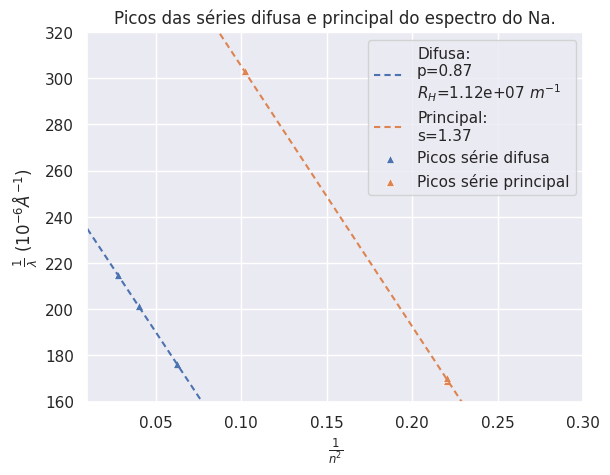

In [189]:
plt.title('Picos das séries difusa e principal do espectro do Na.')

x = np.linspace(0.01, 0.3, 10)

sns.lineplot(x=x, y=linear(x, fits['d'][0], fits['d'][1])*1E6, dashes=(3,2), label=f'Difusa:\np={p:.2f}\n$R_H$={R:.2e} $m^{{-1}}$')
sns.lineplot(x=x, y=linear(x, fits['p'][0], fits['p'][1])*1E6, dashes=(3,2), label=f'Principal:\ns={s:.2f}')

sns.scatterplot(x=1/np.power(na_series['d'][0], 2), y=(1/np.array(na_series['d'][1]))*1E6, marker='^', label='Picos série difusa')
sns.scatterplot(x=xdata, y=ydata*1E6, marker='^', label='Picos série principal')

plt.ylabel('$\\frac{1}{\\lambda}$ ($10^{-6} \\AA^{-1}$)')
plt.xlabel('$\\frac{1}{n^2}$')
plt.xlim(0.01, 0.3)
plt.ylim(160, 320)

plt.savefig('plots/quantum.png', dpi=300, bbox_inches='tight')
plt.show()